In [1]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors

/Users/user/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = "analysis_oct06/noderisk/"
plot_title = 'Infection risk of premises by end of autumn '+r'(seed=730605)'
fig_path = file_path+"/node_risk_seed730605_end_of_autumn.png"
risk_file = file_path+"/noderisk_end_of_autumn_730605.csv"
print(plot_title)

Infection risk of premises by end of autumn (seed=730605)


In [3]:
# Read node_risk file
node_risk = pd.read_csv(risk_file)
node_risk

,Node,Risk
0,726636,0.061628
1,726687,0.061578
2,726791,0.061450
3,726410,0.061400
4,726478,0.061350
...,...,...
63979,730384,0.000000
63980,730373,0.000000
63981,730352,0.000000
63982,731703,0.000000


In [4]:
# Load location data
location_df = pd.read_csv('data/cattle_FLAPS_for_USAMMv3.txt', sep = "\t")
location_df = location_df.loc[location_df.type == "d"]
location_df = location_df[['Id', 'Lat', 'Lon', 'd']]
location_df

,Id,Lat,Lon,d
53,757624,32.590559,-86.803342,16
118,757844,32.591639,-86.467205,13
126,757842,32.543002,-86.472609,15
229,756096,30.615888,-87.854986,4
245,756766,30.393238,-87.517768,2
...,...,...,...,...
815615,729298,43.910056,-108.098869,2
815616,729318,43.933834,-108.010241,2
815749,730103,43.857095,-104.114942,4
815781,730094,44.100281,-104.130074,7


In [5]:
# Merge the dataframes on the location id
merged_df = pd.merge(location_df, node_risk, left_on = 'Id', right_on = 'Node', how = 'left')
merged_df

,Id,Lat,Lon,d,Node,Risk
0,757624,32.590559,-86.803342,16,757624,0.0
1,757844,32.591639,-86.467205,13,757844,0.0
2,757842,32.543002,-86.472609,15,757842,0.0
3,756096,30.615888,-87.854986,4,756096,0.0
4,756766,30.393238,-87.517768,2,756766,0.0
...,...,...,...,...,...,...
63979,729298,43.910056,-108.098869,2,729298,0.0
63980,729318,43.933834,-108.010241,2,729318,0.0
63981,730103,43.857095,-104.114942,4,730103,0.0
63982,730094,44.100281,-104.130074,7,730094,0.0


In [6]:
merged_df = merged_df.drop(columns=['Id'])
merged_df

,Lat,Lon,d,Node,Risk
0,32.590559,-86.803342,16,757624,0.0
1,32.591639,-86.467205,13,757844,0.0
2,32.543002,-86.472609,15,757842,0.0
3,30.615888,-87.854986,4,756096,0.0
4,30.393238,-87.517768,2,756766,0.0
...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0
63980,43.933834,-108.010241,2,729318,0.0
63981,43.857095,-104.114942,4,730103,0.0
63982,44.100281,-104.130074,7,730094,0.0


In [7]:
# Create a GeoDataFrame from the merged DataFrame
plot_gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['Lon'], merged_df['Lat']))
plot_gdf

,Lat,Lon,d,Node,Risk,geometry
0,32.590559,-86.803342,16,757624,0.0,POINT (-86.80334 32.59056)
1,32.591639,-86.467205,13,757844,0.0,POINT (-86.46721 32.59164)
2,32.543002,-86.472609,15,757842,0.0,POINT (-86.47261 32.54300)
3,30.615888,-87.854986,4,756096,0.0,POINT (-87.85499 30.61589)
4,30.393238,-87.517768,2,756766,0.0,POINT (-87.51777 30.39324)
...,...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0,POINT (-108.09887 43.91006)
63980,43.933834,-108.010241,2,729318,0.0,POINT (-108.01024 43.93383)
63981,43.857095,-104.114942,4,730103,0.0,POINT (-104.11494 43.85710)
63982,44.100281,-104.130074,7,730094,0.0,POINT (-104.13007 44.10028)


In [8]:
# Load the shapefiles
shapefile_county = 'data/gadm41_USA_shp/gadm41_USA_2.shp'  
counties_sf = gpd.read_file(shapefile_county)
counties_sf = counties_sf.cx[-130:-60, 25:50]

shapefile_state = 'data/gadm41_USA_shp/gadm41_USA_1.shp'  
states_sf = gpd.read_file(shapefile_state)
states_sf = states_sf.cx[-130:-60, 25:50]

In [9]:
# Source
plot_gdf_source = plot_gdf[plot_gdf.Node == 730575]
plot_gdf_source

,Lat,Lon,d,Node,Risk,geometry
47402,34.585765,-102.211606,15164,730575,0.055961,POINT (-102.21161 34.58577)


In [10]:
# Separate nodes with risk 0 and risk > 0
plot_gdf_risk_0 = plot_gdf[plot_gdf['Risk'] == 0]
plot_gdf_risk_0

,Lat,Lon,d,Node,Risk,geometry
0,32.590559,-86.803342,16,757624,0.0,POINT (-86.80334 32.59056)
1,32.591639,-86.467205,13,757844,0.0,POINT (-86.46721 32.59164)
2,32.543002,-86.472609,15,757842,0.0,POINT (-86.47261 32.54300)
3,30.615888,-87.854986,4,756096,0.0,POINT (-87.85499 30.61589)
4,30.393238,-87.517768,2,756766,0.0,POINT (-87.51777 30.39324)
...,...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0,POINT (-108.09887 43.91006)
63980,43.933834,-108.010241,2,729318,0.0,POINT (-108.01024 43.93383)
63981,43.857095,-104.114942,4,730103,0.0,POINT (-104.11494 43.85710)
63982,44.100281,-104.130074,7,730094,0.0,POINT (-104.13007 44.10028)


In [11]:
plot_gdf_risk_nonzero = plot_gdf[plot_gdf['Risk'] > 0]
plot_gdf_risk_nonzero

,Lat,Lon,d,Node,Risk,geometry
52,34.022654,-86.839009,394,757595,0.000078,POINT (-86.83901 34.02265)
82,33.687598,-87.883088,518,756024,0.000378,POINT (-87.88309 33.68760)
85,33.730831,-87.709074,108,756409,0.000078,POINT (-87.70907 33.73083)
155,32.237128,-85.636049,248,759409,0.000050,POINT (-85.63605 32.23713)
180,34.559825,-86.888727,578,757566,0.000039,POINT (-86.88873 34.55982)
...,...,...,...,...,...,...
63905,42.991353,-111.021424,337,728837,0.000494,POINT (-111.02142 42.99135)
63921,44.531531,-108.937590,474,729144,0.000039,POINT (-108.93759 44.53153)
63931,44.398590,-109.201312,3814,729102,0.001017,POINT (-109.20131 44.39859)
63937,41.790555,-105.250891,432,729772,0.000017,POINT (-105.25089 41.79055)


In [12]:
max_val = plot_gdf_risk_nonzero['Risk'].max()
min_val = plot_gdf_risk_nonzero['Risk'].min() 
print(min_val, max_val)

5.555555555555556e-06 0.0616277777777777


In [13]:
epsilon = 0.01
plot_gdf_risk_nonzero['Risk_norm'] = epsilon + (1-epsilon) * ((plot_gdf_risk_nonzero['Risk'] - min_val) / (max_val - min_val))
plot_gdf_risk_nonzero

/Users/user/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Lat,Lon,d,Node,Risk,geometry,Risk_norm
52,34.022654,-86.839009,394,757595,0.000078,POINT (-86.83901 34.02265),0.011160
82,33.687598,-87.883088,518,756024,0.000378,POINT (-87.88309 33.68760),0.015980
85,33.730831,-87.709074,108,756409,0.000078,POINT (-87.70907 33.73083),0.011160
155,32.237128,-85.636049,248,759409,0.000050,POINT (-85.63605 32.23713),0.010714
180,34.559825,-86.888727,578,757566,0.000039,POINT (-86.88873 34.55982),0.010536
...,...,...,...,...,...,...,...
63905,42.991353,-111.021424,337,728837,0.000494,POINT (-111.02142 42.99135),0.017854
63921,44.531531,-108.937590,474,729144,0.000039,POINT (-108.93759 44.53153),0.010536
63931,44.398590,-109.201312,3814,729102,0.001017,POINT (-109.20131 44.39859),0.026244
63937,41.790555,-105.250891,432,729772,0.000017,POINT (-105.25089 41.79055),0.010179


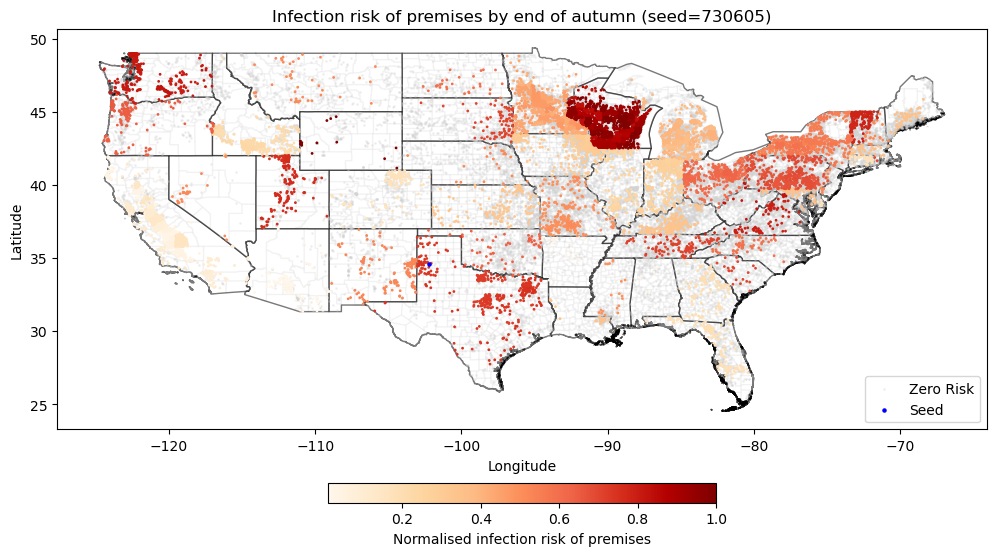

In [1]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))# Plot counties and use the 'weighted_avg_risk' column for the color
# 'viridis' is a colormap that works well for representing a range of values
counties_with_risk.plot(
    column='weighted_avg_risk',   # Column to be used for coloring
    cmap='viridis',               # Color map (e.g., 'viridis', 'plasma', 'OrRd')
    linewidth=0.5,                # Line width of county borders
    edgecolor='black',            # Color of county borders
    legend=True,                  # Show a legend for the color scale
    legend_kwds={'label': "Weighted Average Infection Risk", 'orientation': "vertical"},
    ax=ax                         # Plot on the specified axis
)

# Set a title for the map
ax.set_title('Weighted Average Infection Risk by County', fontsize=15)

# Remove axes for a cleaner look
ax.set_axis_off()

# Step 3: Display the plot
plt.show()


NameError: name 'plt' is not defined

In [ ]:
# Plot the shapefile
fig, ax = plt.subplots(figsize=(12, 7))
counties_sf.plot(ax=ax, color='white', edgecolor='grey', alpha = 0.1)
states_sf.plot(ax=ax, color='white', edgecolor='black', alpha = 0.5)

# Plot the points with sizes proportional to the risk
# Plot the nodes with risk 0 as black points
plot_gdf_risk_0.plot(ax=ax, color='lightgrey', markersize=1, alpha=0.25, label='Zero Risk')
# Plot the nodes with risk > 0 using the OrRd colormap
plot_gdf_risk_nonzero.plot(ax=ax, cmap = 'OrRd', markersize= 1, alpha=1)
plot_gdf_source.plot(ax=ax, color='blue', markersize= 5, alpha= 1, label = 'Seed')
# Add a colorbar to represent the risk values
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=mcolors.Normalize(
    vmin=plot_gdf_risk_nonzero['Risk_norm'].min(), vmax=plot_gdf_risk_nonzero['Risk_norm'].max()))
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1)
cbar.set_label('Normalised infection risk of premises')

#fig.tight_layout()
# Customize and show the plot
plt.title(plot_title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right') 
plt.savefig(fig_path, dpi = 600)